In [1]:
from utils.tools import *

In [2]:
path=r"C:\Users\cjang\Desktop\\"
path2 = r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_1_30.mpt']

In [3]:
re = mpt_data(path, data)
re2 = mpt_data(path2, data)


In [7]:
def importer(path, data, mask_front, mask_back):
    mpt_data = EIS_exp(path, data, mask = [mask_front, mask_back])
    df = mpt_data.df_raw
    mpt_data.EIS_plot()
    return [mpt_data, df]

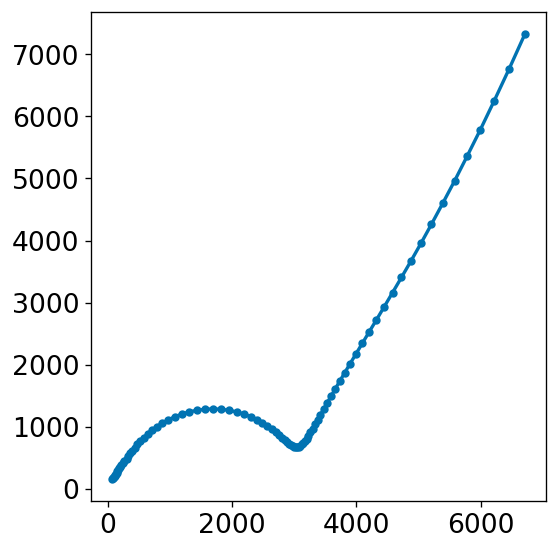

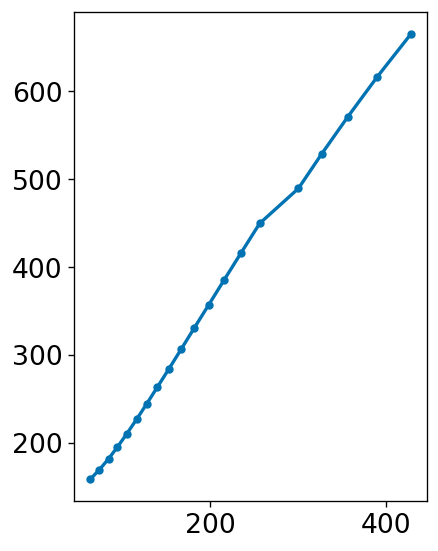

In [12]:
adj_re = importer(path, data, 10**6, 10**1.5)[0]

exam = importer(path2, data, 10**6, 10**1.5)[1]

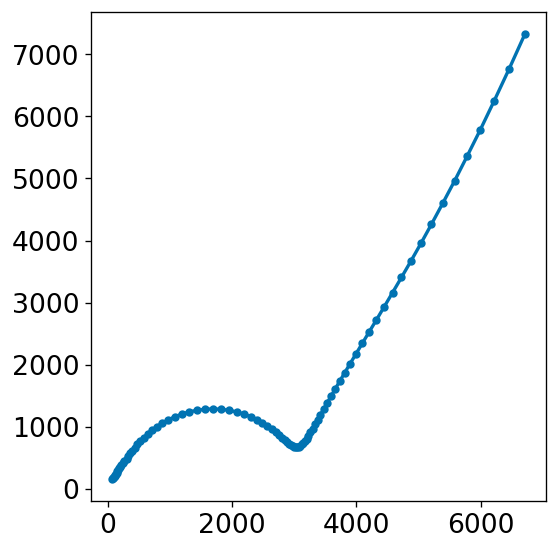

In [13]:
adj_re.mpt_plot()

In [14]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 299
    # data points      = 180
    # variables        = 7
    chi-square         = 187.645703
    reduced chi-square = 1.08465724
    Akaike info crit   = 21.4877798
    Bayesian info crit = 43.8384778
[[Variables]]
    Rs:   39.3265692 +/- 3.18321413 (8.09%) (init = 1000)
    R:    2957.94044 +/- 15.1757501 (0.51%) (init = 2959)
    n:    0.84601808 +/- 0.00304709 (0.36%) (init = 0.8)
    fs:   23050.4496 +/- 204.233584 (0.89%) (init = 23023)
    R2:   292960.600 +/- 102841.962 (35.10%) (init = 258738)
    n2:   0.71084396 +/- 0.00524106 (0.74%) (init = 0.8)
    fs2:  0.21678808 +/- 0.11603917 (53.53%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.812
    C(R, fs)   = -0.795
    C(R, n)    = -0.748
    C(n, fs)   =  0.677
    C(R, fs2)  =  0.663
    C(R, R2)   = -0.649
    C(fs, n2)  = -0.629
  

In [15]:
adj_re.fit_Rs[0]


39.32656915622596

In [16]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params1 = Parameters()
params1.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params1.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params1.add('n', value=n_guess, min=.65, max=1.2)
params1.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params1.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params1.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params1.add('n2', value=n2_guess, min=.65, max=1.2)
params1.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params1.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params1, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 218
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419108
    reduced chi-square = 1.08334744
    Akaike info crit   = 21.2702856
    Bayesian info crit = 43.6209836
[[Variables]]
    Rs:   40.5524952 +/- 3.22552652 (7.95%) (init = 2957.94)
    R:    2955.52717 +/- 15.2675688 (0.52%) (init = 2957.94)
    n:    0.84660074 +/- 0.00308440 (0.36%) (init = 0.8460181)
    fs:   23059.0659 +/- 205.191429 (0.89%) (init = 23050.45)
    R2:   297010.640 +/- 106135.058 (35.73%) (init = 292960.6)
    n2:   0.71055416 +/- 0.00526475 (0.74%) (init = 0.710844)
    fs2:  0.21214152 +/- 0.11558145 (54.48%) (init = 0.2167881)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0.65

C:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:148: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  ax.plot(self.circuit_fit[i].real, -self.circuit_fit[i].imag, lw=0, marker='o', ms=8, mec='r', mew=1, mfc='none', label='')
C:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:148: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  ax.plot(self.circuit_fit[i].real, -self.circuit_fit[i].imag, lw=0, marker='o', ms=8, mec='r', mew=1, mfc='none', label='')


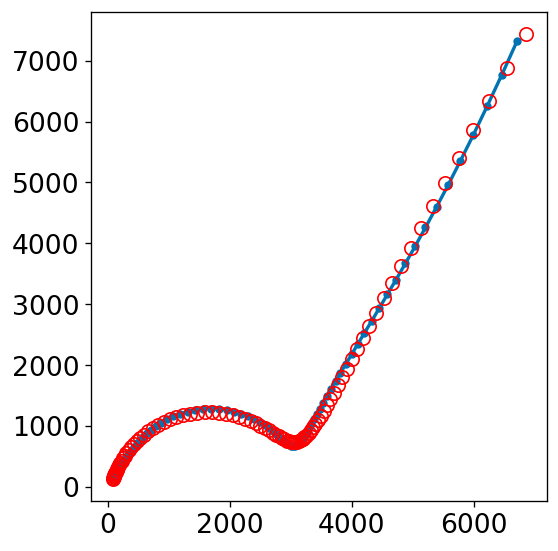

In [18]:
adj_re.mpt_plot(fitting = 'on')

In [34]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params2 = Parameters()
params2.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params2.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params2.add('n', value=n_guess, min=.65, max=1.2)
params2.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params2.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params2.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params2.add('n2', value=n2_guess, min=.65, max=1.2)
params2.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params2.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 80
    # variables        = 7
    chi-square         = 3.8032e+09
    reduced chi-square = 52098728.1
    Akaike info crit   = 1428.16671
    Bayesian info crit = 1444.84090
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    n:    at boundary
    fs:   at initial value
    fs:   at boundary
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
[[Variables]]
    Rs:   10086.0765 (init = 10086.08)
    R:    10086.0765 (init = 10086.08)
    n:    1.20000000 (init = 1.2)
    fs:   3.16227766 (init = 3.162278)
    R2:   2059664.91 (init = 2059665)
    n2:   0.80279456 (init = 0.8027946)
    fs2:  0.01000000 (init = 0.01)
None


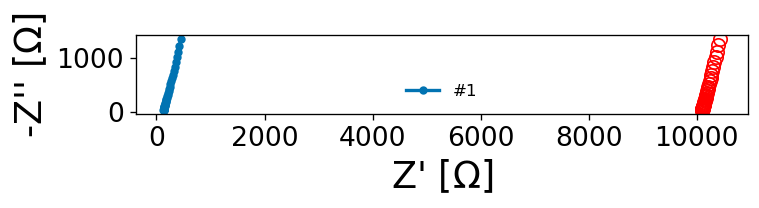

In [35]:
adj_re.EIS_plot(fitting = 'on')

In [36]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


10086.07652549687
10086.076525496866
1.1999999999999997
3.1622776607790004
2059664.9118890716
0.8027945596177198
0.010000000000000555


In [37]:
50.59,2.626e-9,1,54.58,1.457e-6,0.9547,4.793

(50.59, 2.626e-09, 1, 54.58, 1.457e-06, 0.9547, 4.793)

In [38]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(4.3422762290009834e-07, 7.872870829251868e-05)

In [39]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params3 = Parameters()
params3.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params3.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params3.add('n', value=n_guess, min=.65, max=1.2)
params3.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params3.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params3.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params3.add('n2', value=n2_guess, min=.65, max=1.2)
params3.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params3.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 80
    # variables        = 7
    chi-square         = 3.8032e+09
    reduced chi-square = 52098728.1
    Akaike info crit   = 1428.16671
    Bayesian info crit = 1444.84090
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    n:    at boundary
    fs:   at initial value
    fs:   at boundary
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
[[Variables]]
    Rs:   10086.0765 (init = 10086.08)
    R:    10086.0765 (init = 10086.08)
    n:    1.20000000 (init = 1.2)
    fs:   3.16227766 (init = 3.162278)
    R2:   2059664.91 (init = 2059665)
    n2:   0.80279456 (init = 0.8027946)
    fs2:  0.01000000 (init = 0.01)
None


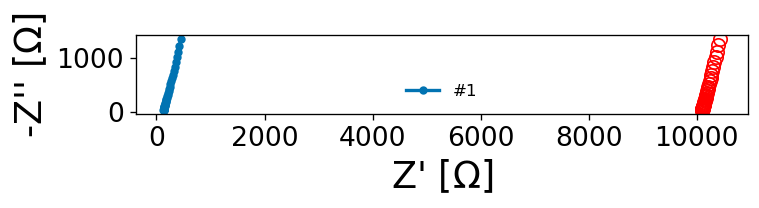

In [40]:
adj_re.EIS_plot(fitting = 'on')

In [18]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


52.9860228084285
51.93283807344667
1.0342861600351647
999999.9999999485
25471.87974520534
0.9478121541424711
4.77470645325736


In [19]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(1.5648714631341907e-09, 2.653648181395838e-06)